# Predictions for YOLOv9, YOLOv8, YOLOv5, YOLOv6

In [5]:
import pandas as pd
import torch
import os
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import pathlib
#from IPython.display import display, Image
import cv2
from os.path import join

In [6]:
%cd /scratch/xw10/jj8584

/scratch/xw10/jj8584


# Define Global Variables and Functions

## Display the Ground Truth Images used as Test

In [7]:


with open('/scratch/xw10/jj8584/DATA/data.yaml', 'r') as f:
    data_yaml = yaml.safe_load(f)
    
   
data_directory = '/scratch/xw10/jj8584/DATA'
test_img_dir = join(data_directory,'test/images')
test_labels_dir = join(data_directory,'test/labels')
    
class_names = data_yaml['names']

In [8]:
import random
from os.path import join
def ground_truth(n=5):
    # Number of images to randomly select
    num_images = n
    
    image_files = [f for f in pathlib.Path(test_img_dir).iterdir() if f.is_file()] # path object
    
    # randomly shuffle the images
    random.shuffle(image_files)
    
    # select the 5 randomly selected files
    return image_files[:num_images]

In [54]:
def annotate_ground_truth(image_ls):
   
    for select_img in selected_image_files:
    
        # set the image
        demo_image = select_img
    
        #retrieve the label's corresponding text file
        # / operator is used to join paths
        # 'stem' removes the file extension and matches the image to the annotation file
        demo_label =  pathlib.Path(test_labels_dir) / f"{select_img.stem}.txt" 
        
        # Load the image using OpenCV's imread function
        image = cv2.imread(str(demo_image))
    
        # Get the list of class names from the 'data' dictionary
        class_list = data_yaml['names']
    
        # Define a list of colors to be used to draw bounding boxes
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    
        # Get the height and width of the image
        height, width, _ = image.shape
    
        # Create an empty list T
        T = []
    
        with open(demo_label, "r") as file1:
            for line in file1.readlines():
                # Split the line into a list of strings
                split = line.split(" ")
    
                # Get the class id from the first element of the split list
                class_id = int(split[0])
    
                # Get the color corresponding to the class id from the 'colors' list
                color = colors[class_id]
                clazz = class_list[class_id]
                
                # Get the x, y, w, h bounding box coordinates from the split list
                x, y, w, h = float(split[1]), float(split[2]), float(split[3]), float(split[4])
    
                # Rescale the x, y, w, h values to the size of the image
                box = [int((x - 0.5*w)* width), int((y - 0.5*h) * height), int(w*width), int(h*height)]
    
                # Draw a rectangle on the image using the 'box' and 'color' values
                cv2.rectangle(image, box, color, 2)
    
                # Draw a filled rectangle for the class label on the image
                cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
    
                # Write the class label on the image
                cv2.putText(image, class_list[class_id], (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
    
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # Optionally resize the image (commented out in code)
        image = cv2.resize(image, (600, 600))
        plt.show()

In [10]:
selected_image_files = ground_truth()


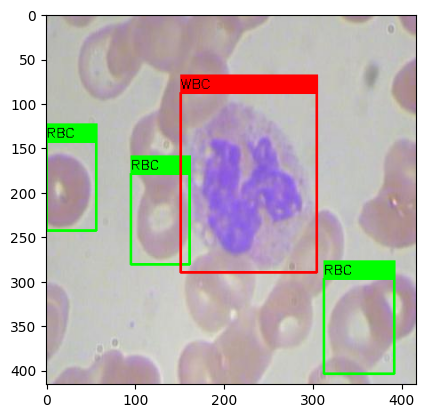

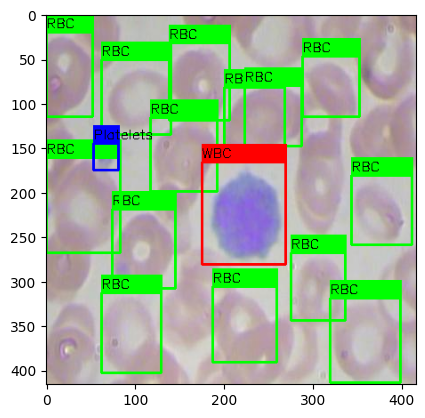

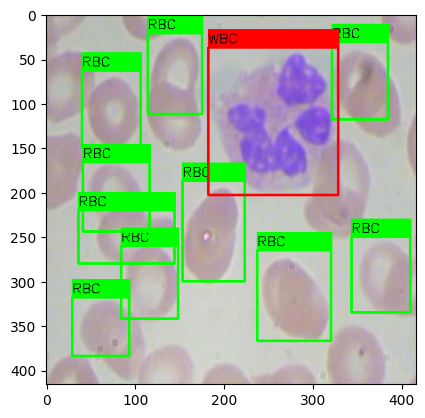

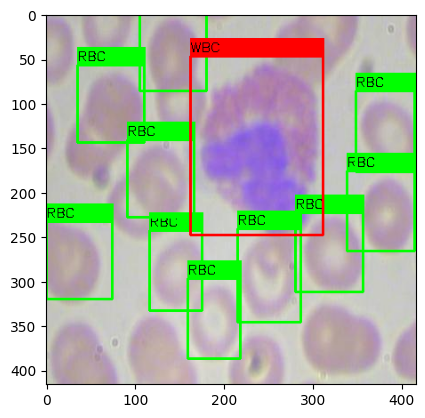

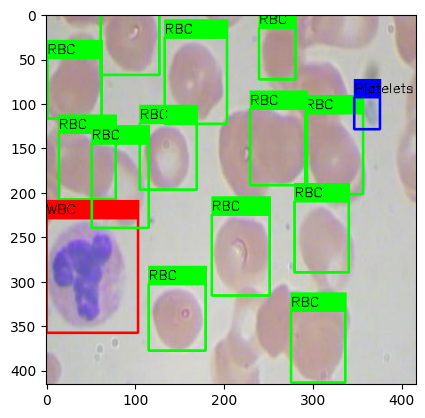

In [55]:
annotate_ground_truth(selected_image_files)

## Save Output Function

In [64]:
def save_output(ls, result_obj, date, model_name, folder, conf_val='conf025'):
    for i, pred in enumerate(result_obj):
        for j, img in enumerate(ls):
            if i == j:
                filename = img.stem.split('.')[0]
                pred.save(filename=f'runs/detect/predict/{folder}/{date}_{model_name}_{conf_val}_{filename}.jpg')
                    #print(result)

# YOLOV9 Predictions

In [49]:
V9_valid = YOLO('runs/detect/trainV9_280424_validation/weights/best.pt')
V9_pred = V9_valid(selected_image_files)


0: 416x416 14 RBCs, 1 WBC, 5.6ms
1: 416x416 1 Platelets, 24 RBCs, 1 WBC, 5.6ms
2: 416x416 20 RBCs, 1 WBC, 5.6ms
3: 416x416 21 RBCs, 1 WBC, 5.6ms
4: 416x416 1 Platelets, 17 RBCs, 1 WBC, 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)


In [52]:
save_output(ls=selected_image_files, result_obj= V9_pred,date='3004', model_name = "YOLOV9", folder = 'V9_Results')

# YOLOV8 Predictions

## On full set of parameters (Val= True)
### Model: V8_300424

In [68]:
V8_valid_full = YOLO('runs/detect/V8/trainV8_300424/weights/best.pt')
V8_pred_full = V8_valid_full(selected_image_files)


0: 416x416 (no detections), 9.6ms
1: 416x416 (no detections), 9.6ms
2: 416x416 (no detections), 9.6ms
3: 416x416 (no detections), 9.6ms
4: 416x416 (no detections), 9.6ms
Speed: 1.3ms preprocess, 9.6ms inference, 0.2ms postprocess per image at shape (1, 3, 416, 416)


In [69]:
save_output(ls=selected_image_files, result_obj= V8_pred,date='3004', model_name = "YOLOV8_fullparams", folder ='V8_results/V8_full_params')

## Step by Step Image processing (Val= False) 

### Model: V8 train_loss_240524

In [62]:
V8_valid = YOLO('runs/detect/V8/train_loss_240524/weights/best.pt')
V8_pred = V8_valid(selected_image_files)


0: 416x416 15 RBCs, 1 WBC, 9.6ms
1: 416x416 1 Platelets, 25 RBCs, 1 WBC, 9.6ms
2: 416x416 22 RBCs, 1 WBC, 9.6ms
3: 416x416 19 RBCs, 1 WBC, 9.6ms
4: 416x416 1 Platelets, 22 RBCs, 1 WBC, 9.6ms
Speed: 0.8ms preprocess, 9.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)


In [67]:
save_output(ls=selected_image_files, result_obj= V8_pred,date='3004', model_name = "YOLOV8_loss2405", folder ='V8_results/V8_loss_2405')

# YOLOV5 Predictions

# YOLOV4 Predictions